In [1]:
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Создадим выборку из стандартного нормального распределения размера $N = 10^4$:

In [2]:
N = 10 ** 4
norm_rv = sts.norm()
sample = norm_rv.rvs(N)

Зададим список разных значений $n$ - размера выборки:

In [3]:
ns = [10, 25, 50, 100, 1000, N]

Для каждого размера выборки посчитаем эмпирическую функцию распределения, а также построим графики эмпирической функции распределения (отмечая на оси абсцисс точки "скачков" кривых, нанеся каждую из "подвыборок" на ось абсцисс), нанеся на каждый из них истинную функцию распределения:

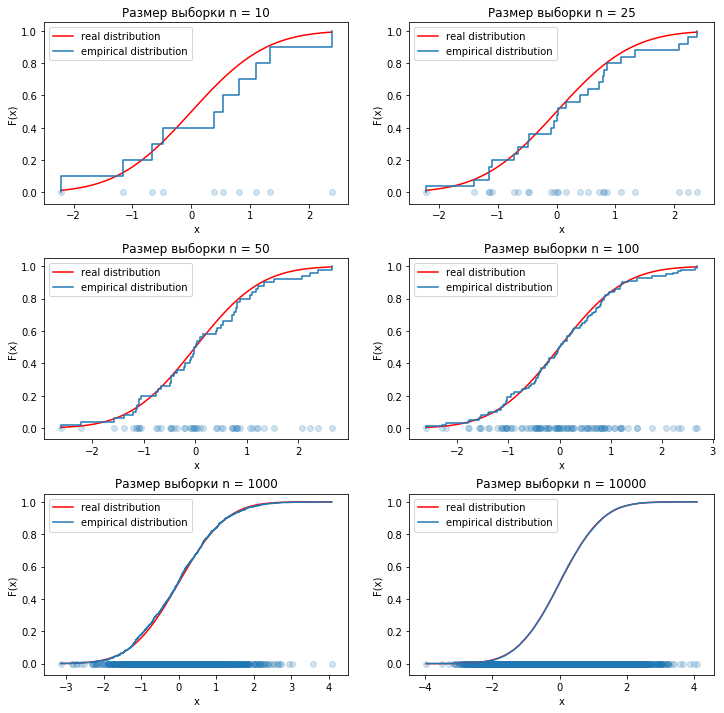

In [4]:
plt.figure(figsize=(12, 12))
plt.subplots_adjust(hspace=0.3)
for i in range(len(ns)):
    plt.subplot(3, 2, i + 1)
    data = sample[:ns[i]]
    ecdf = ECDF(data)
    x = np.linspace(min(data), max(data))
    empirical_distribution = ecdf.y
    real_distribution = sts.norm.cdf(x)
    plt.plot(x, real_distribution, "r", label="real distribution")
    plt.step(ecdf.x, empirical_distribution, 
             label="empirical distribution", where="post")
    plt.title("Размер выборки n = {}".format(ns[i]))
    plt.xlabel("x")
    plt.ylabel("F(x)")
    plt.scatter(data, np.zeros(len(data)), alpha=0.2)
    plt.legend(loc="best");

Видим, что при увеличении выборки эмпиричиская функция распределения все ближе приближается к истинной. Рассмотрим это более подробно.

Для каждого $n \leqslant N$ найдем эмпирическую функцию распределения для выборки размера $n$, посчитаем значение $D_n = \sup_{x \in \mathbb{R}}|\hat{F_n}(x) - F_n(x)|$, как можно заметить исходя из того, что наша эмперическая функция ступенчатая, то супремум можно посчиать как максимум из максимума модуля разности по точкам из выборки и максимума разности функций, если мы в эмпирической функции сместим все точки выборки на один вправо, то есть будем считать $\max(\max_{X_i}|\hat{F_n}(X_{i}) - F_n(X_i)|, \max_{X_i}|\hat{F_n}(X_{i + 1}) - F_n(X_i)|)$. После этого построим графики зависимости статистик $D_n$ и $\sqrt{n} \cdot D_N$ от $n$:

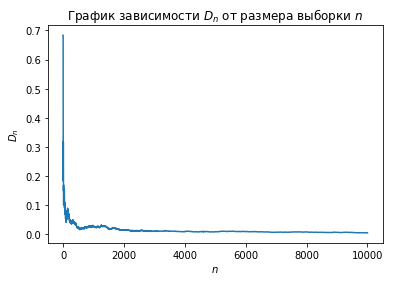

In [5]:
D = np.zeros(N)
for n in range(N):
    data = sample[:n + 1]
    ecdf = ECDF(data)
    empirical_distribution = ecdf.y
    real_distribution = sts.norm.cdf(ecdf.x)
    rolled_empirical_distribution = np.roll(empirical_distribution, 1)
    rolled_empirical_distribution[0] = 0
    D[n] = max(max(abs(real_distribution - empirical_distribution)), 
               max(abs(real_distribution - rolled_empirical_distribution)))
plt.title(r"График зависимости $D_n$ от размера выборки $n$")
plt.xlabel(r"$n$")
plt.ylabel(r"$D_n$")
plt.plot(range(1, N + 1), D);

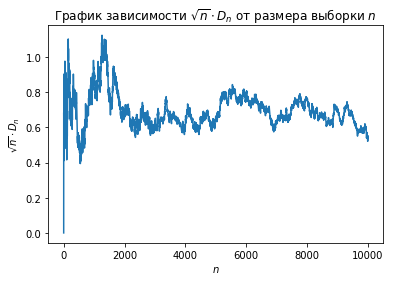

In [6]:
plt.title(r"График зависимости $\sqrt{n} \cdot D_n$ от размера выборки $n$")
plt.xlabel(r"$n$")
plt.ylabel(r"$\sqrt{n} \cdot D_n$")
plt.plot(range(1, N + 1), D * np.sqrt(np.arange(len(D))));

$\textbf{Вывод:}$ Как видно из первого графика, эмпирическая функция распределения равномерно стремится к истинной функции распределения при увеличении выборки, что соответсвует теореме Гливенко-Кантелли, которая говорит, что $\sup_{x \in \mathbb{R}}|\hat{F_n}(x) - F_n(x)| \xrightarrow{\text{п.н.}} 0$. Из второго графика можно сказать, что скорость сходимсоти пропорциональна $\frac{1}{\sqrt{n}}$ (так как $\sqrt{n} \cdot D_n$ стремится к числу приблизительно равном 0.8), где $n$ - размер выборки, что соответствует теореме Колмогорова о том, что $\sqrt{n} \cdot D_n \xrightarrow{d} K$, где $K$ - случайная величина, имеющая распределение Колмогорова.